# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

In [2]:
iris = pd.read_csv("iris.csv")
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,Iris-setosa
136,137,6.3,3.4,5.6,2.4,Iris-virginica
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
5,6,5.4,3.9,1.7,0.4,Iris-setosa
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [3]:
# We will not require ID filed for further analysis, may be good idea to drop it
iris = iris.drop('Id', axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [4]:
# Checking if we are having any Null values
iris.isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [5]:
iris.fillna(iris.median(), inplace=True)

In [6]:
# Recounting the Null values for confirmation
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [7]:
#Check the unique values for species column
print(iris['Species'].unique())

iris = iris.apply(preprocessing.LabelEncoder().fit_transform)

#Check the unique values for species column post label encoder
print(iris['Species'].unique())

#Printing sample data of 10
iris.sample(10)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
74,21,8,19,9,1
124,24,12,34,17,2
108,24,4,35,14,2
1,6,9,4,1,0
130,31,7,38,15,2
41,2,2,3,2,0
16,11,18,3,3,0
127,18,9,26,14,2
133,20,7,28,11,2
47,3,11,4,1,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [8]:
# Method 1
corr_matrix = iris.corr()
print(corr_matrix["Species"])

SepalLengthCm    0.778151
SepalWidthCm    -0.418901
PetalLengthCm    0.931134
PetalWidthCm     0.942812
Species          1.000000
Name: Species, dtype: float64


In [9]:
# Method 2
iris.corr()['Species']

SepalLengthCm    0.778151
SepalWidthCm    -0.418901
PetalLengthCm    0.931134
PetalWidthCm     0.942812
Species          1.000000
Name: Species, dtype: float64

In [10]:
# Checking if we are having any correlation in range of -0.1 to 0.1
iris.corr()['Species'].between(-0.1, 0.1, inclusive=True)

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
Name: Species, dtype: bool

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [11]:
iris.var() < 0.1

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

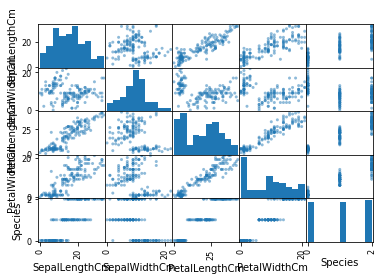

In [12]:
dummy = pd.plotting.scatter_matrix(iris)

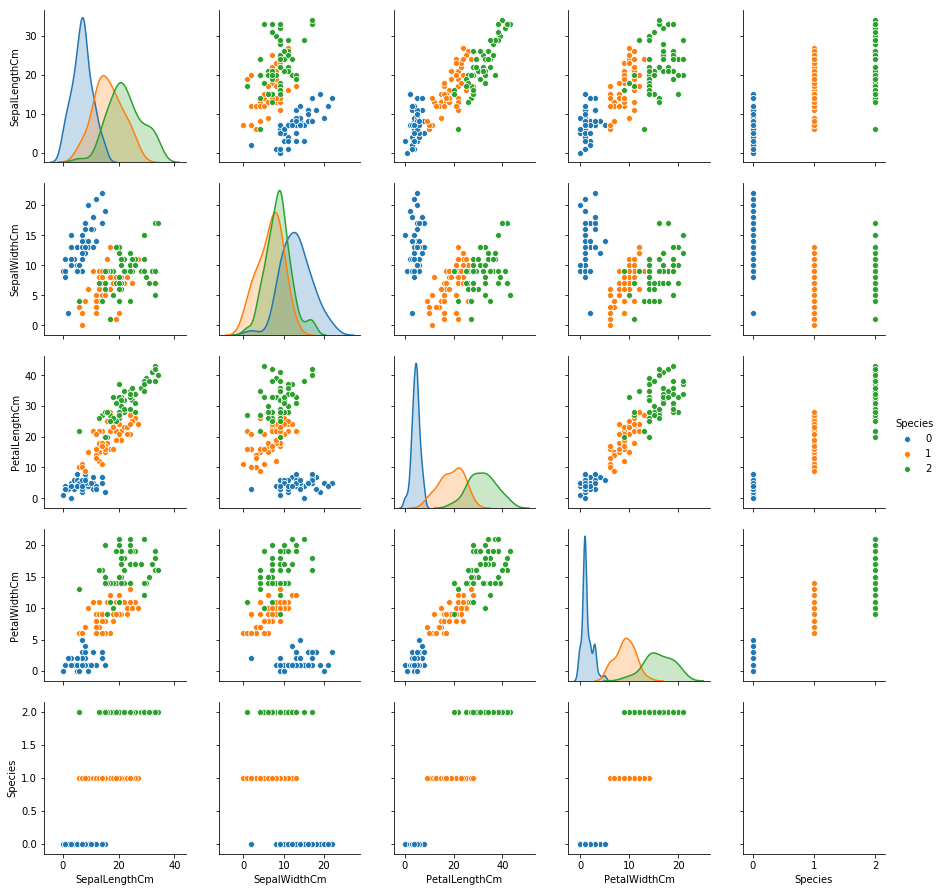

In [13]:
sns.pairplot(iris,hue='Species')

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [14]:
y=iris['Species']
X = iris.drop('Species',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [15]:
sc=StandardScaler()

knn=KNeighborsClassifier(n_neighbors=3)
sc.fit(X_train)

scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

knn.fit(scaledX_train,y_train)


from sklearn.metrics import accuracy_score

print("What is the Training Accuracy")
print(accuracy_score(y_train, knn.predict(scaledX_train)), "\n")

print("What is the Testing Accuracy")
print(accuracy_score(y_test,knn.predict(scaledX_test)))

What is the Training Accuracy
0.9504132231404959 

What is the Testing Accuracy
0.9354838709677419


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [16]:
neighbors = np.arange(1, 21, 2)
#Printing the range to confirm
print(neighbors)

[ 1  3  5  7  9 11 13 15 17 19]


In [21]:
# Creating a Dataframe for storing the accuracy scores
Accuracy = pd.DataFrame(columns=['K', 'Train Score', 'Test Score', 'Delta'])

# Loop over different values of k
for i, k in enumerate(neighbors):
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    
    Accuracy.loc[i, 'K'] = k
    Accuracy.loc[i, 'Train Score'] = knn.score(scaledX_train,y_train)
    Accuracy.loc[i, 'Test Score'] = knn.score(scaledX_test,y_test)
    Accuracy.loc[i, 'Delta'] = abs(knn.score(scaledX_train,y_train) - knn.score(scaledX_test,y_test))

print("The best K value for given data set is at:\n", Accuracy[Accuracy.Delta == Accuracy.min()['Delta']])

Accuracy.sort_values(by = ['Delta'], ascending=True)

The best K value for given data set is at:
    K Train Score Test Score        Delta
4  9    0.966942   0.967742  0.000799787


,K,Train Score,Test Score,Delta
4,9,0.966942,0.967742,0.000799787
5,11,0.958678,0.967742,0.00906425
1,3,0.950413,0.935484,0.0149294
6,13,0.950413,0.967742,0.0173287
7,15,0.950413,0.967742,0.0173287
8,17,0.950413,0.967742,0.0173287
9,19,0.950413,0.967742,0.0173287
2,5,0.958678,0.935484,0.0231938
3,7,0.958678,0.935484,0.0231938
0,1,1,0.903226,0.0967742


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

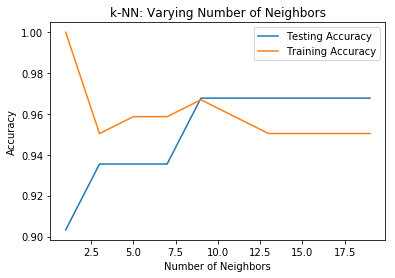

In [18]:
from matplotlib import pyplot as plt

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(Accuracy['K'], Accuracy['Test Score'], label = 'Testing Accuracy')
plt.plot(Accuracy['K'], Accuracy['Train Score'], label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Above solution is having a slight defect for fixed random_state value.
With different random_state values we are getting different K values.
To overcome that we will introduce another iterrrator in our next exrcise below.

In [27]:
# Creating a new Dataframe for storing the accuracy scores with different set of Random states
Accuracy2 = pd.DataFrame(columns=['K', 'Train Score', 'Test Score', 'Delta'])

# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    
    # Loop over different values of random states lets say 20 iterations are fine
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))

    # Storing the mean scores in our dataframe
    Accuracy2.loc[i, 'K'] = k
    Accuracy2.loc[i, 'Train Score'] = np.mean(train)
    Accuracy2.loc[i, 'Test Score'] = np.mean(test)
    Accuracy2.loc[i, 'Delta'] = abs(np.mean(train) - np.mean(test))

print("The best K value for given data set is at:\n", Accuracy2[Accuracy2.Delta == Accuracy2.min()['Delta']])
Accuracy2.sort_values(by = ['Delta'], ascending=True)    

The best K value for given data set is at:
    K Train Score Test Score       Delta
4  9    0.956612   0.958065  0.00145295


,K,Train Score,Test Score,Delta
4,9,0.956612,0.958065,0.00145295
1,3,0.951653,0.95,0.00165289
3,7,0.953719,0.956452,0.0027326
2,5,0.94876,0.954839,0.00607838
7,15,0.953306,0.962903,0.00959744
6,13,0.954132,0.964516,0.0103839
8,17,0.947521,0.96129,0.0137697
9,19,0.945455,0.96129,0.0158358
5,11,0.952893,0.969355,0.0164623
0,1,1,0.935484,0.0645161


Its nice, we are getting consistent best K value

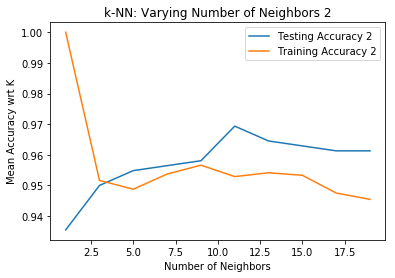

In [30]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors 2')
plt.plot(Accuracy2['K'], Accuracy2['Test Score'], label = 'Testing Accuracy 2')
plt.plot(Accuracy2['K'], Accuracy2['Train Score'], label = 'Training Accuracy 2')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy wrt K')
plt.show()

# Thank You!

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [114]:
bc = pd.read_csv("bc2.csv")
bc.sample(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
178,1202125,4,1,1,1,2,1,3,1,1,2
519,1330439,4,7,8,3,4,10,9,1,1,4
608,557583,5,10,10,10,10,10,10,1,1,4
374,560680,3,1,2,1,2,1,2,1,1,2
150,1188472,1,1,1,1,1,1,3,1,1,2
468,1105524,4,1,1,1,2,1,1,1,1,2
482,1318169,9,10,10,10,10,5,10,10,10,4
584,1217717,5,1,1,6,3,1,1,1,1,2
180,1203096,1,1,1,1,1,1,3,1,1,2
556,1321264,5,2,2,2,1,1,2,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [115]:
# Reading number of rows & columns in dataframe
bc.shape

(699, 11)

In [116]:
# Getting some more insights about dataframe
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [117]:
bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [118]:
bc.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


#### From above we should get to know there is some issue with 'Bare Nuclei' column as data type is detected as object for against numerical values, this generally happens due to inconsistency in data, lets find it further

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [119]:
# Lets Get rid of the ID column before doing any further analysis
bc = bc.drop('ID', axis=1)
bc.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [120]:
bc.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [121]:
#### I hope this is what does it mean by checking for missing values :)
bc.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [122]:
 np.sum(bc['Bare Nuclei'] =='?')

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [123]:
# Checking what the top value is
bc['Bare Nuclei'].describe(include=all).top

'1'

In [126]:
bc['Bare Nuclei'].replace(to_replace='?', value=bc['Bare Nuclei'].describe(include=all).top, inplace=True)

In [127]:
# re-counting '?''s
np.sum(bc['Bare Nuclei'] =='?')

0

### Question 5
#### Find the distribution of target variable (Class) 

#### Plot the distribution of target variable using histogram

#### Convert the datatype of Bare Nuclei to `int`

In [134]:
bc['Bare Nuclei'] = pd.to_numeric(bc['Bare Nuclei'])
bc['Bare Nuclei'].dtypes

dtype('int64')

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

#### Divide the Training and Test sets in 70:30 

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.